In [88]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

df = pd.read_csv('weather_brooklynset.csv',header=None,index_col=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,374604,8540483,B02764,2015-01-01 00:00:05,B02764,255,Brooklyn,Williamsburg (North Side),1.420088e+09,1,268.05,59,1022,sky is clear,249,2
1,1461460,11276514,B02617,2015-01-01 00:00:16,B02617,225,Brooklyn,Stuyvesant Heights,1.420088e+09,1,268.05,59,1022,sky is clear,249,2
2,807567,8973446,B02764,2015-01-01 00:00:19,B02764,181,Brooklyn,Park Slope,1.420088e+09,1,268.05,59,1022,sky is clear,249,2
3,1050910,9711467,B02617,2015-01-01 00:00:27,B02764,33,Brooklyn,Brooklyn Heights,1.420088e+09,1,268.05,59,1022,sky is clear,249,2
4,271751,1451089,B02764,2015-01-01 00:00:31,B02764,61,Brooklyn,Crown Heights North,1.420088e+09,1,268.05,59,1022,sky is clear,249,2
5,1673298,12183943,B02682,2015-01-01 00:00:32,B02682,14,Brooklyn,Bay Ridge,1.420088e+09,1,268.05,59,1022,sky is clear,249,2
6,1704990,12346644,B02617,2015-01-01 00:00:34,B02764,106,Brooklyn,Gowanus,1.420088e+09,1,268.05,59,1022,sky is clear,249,2
7,1710904,12352558,B02682,2015-01-01 00:00:36,B02682,106,Brooklyn,Gowanus,1.420088e+09,1,268.05,59,1022,sky is clear,249,2
8,217534,1396872,B02598,2015-01-01 00:00:39,NaN,61,Brooklyn,Crown Heights North,1.420088e+09,1,268.05,59,1022,sky is clear,249,2
9,649933,8815812,B02617,2015-01-01 00:00:45,B02617,256,Brooklyn,Williamsburg (South Side),1.420088e+09,1,268.05,59,1022,sky is clear,249,2


In [89]:
df=df.drop([0,1,2,4,5,6,8,10,11,12,13,14,15],axis=1)
df

,3,7,9
0,2015-01-01 00:00:05,Williamsburg (North Side),1
1,2015-01-01 00:00:16,Stuyvesant Heights,1
2,2015-01-01 00:00:19,Park Slope,1
3,2015-01-01 00:00:27,Brooklyn Heights,1
4,2015-01-01 00:00:31,Crown Heights North,1
5,2015-01-01 00:00:32,Bay Ridge,1
6,2015-01-01 00:00:34,Gowanus,1
7,2015-01-01 00:00:36,Gowanus,1
8,2015-01-01 00:00:39,Crown Heights North,1
9,2015-01-01 00:00:45,Williamsburg (South Side),1


In [90]:
a = df.groupby([7,9]).size().reset_index(name='count')
a

,7,9,count
0,Bath Beach,1,5
1,Bath Beach,2,1
2,Bath Beach,3,1
3,Bath Beach,4,1
4,Bath Beach,7,1
5,Bath Beach,8,1
6,Bath Beach,12,3
7,Bath Beach,15,1
8,Bath Beach,17,1
9,Bath Beach,25,1


In [91]:
import pandas as pd
t = df.groupby([7,9])
t

In [92]:
import random
lbl=[]
area=[]
sample=[]
for name,group in t:
#    if (len(group['2'])>1):
    lbl.append(name[1])
    area.append(name[0])
    sample.append(group[3].sample(1))

In [93]:
newsample=[]
for i in range(0,len(sample)):
    newsample.append(str((list(sample[i]))[0]))

In [94]:
newsample

['2015-01-01 00:03:58',
 '2015-01-01 00:43:24',
 '2015-01-01 01:13:37',
 '2015-01-01 01:51:15',
 '2015-01-01 03:22:42',
 '2015-01-01 03:37:18',
 '2015-01-01 05:59:02',
 '2015-01-01 07:04:37',
 '2015-01-01 08:09:40',
 '2015-01-01 12:15:26',
 '2015-01-01 15:54:44',
 '2015-01-01 19:19:03',
 '2015-01-01 21:15:50',
 '2015-01-01 21:31:04',
 '2015-01-01 23:48:45',
 '2015-01-02 00:31:02',
 '2015-01-02 01:25:20',
 '2015-01-02 08:16:57',
 '2015-01-02 09:25:26',
 '2015-01-02 11:43:40',
 '2015-01-02 13:48:22',
 '2015-01-02 15:15:29',
 '2015-01-02 17:16:26',
 '2015-01-02 19:30:59',
 '2015-01-02 20:03:05',
 '2015-01-02 21:07:24',
 '2015-01-03 08:45:42',
 '2015-01-03 10:19:35',
 '2015-01-03 13:04:16',
 '2015-01-03 15:55:07',
 '2015-01-03 18:22:22',
 '2015-01-03 20:00:14',
 '2015-01-03 23:35:50',
 '2015-01-04 01:18:09',
 '2015-01-04 01:59:52',
 '2015-01-04 04:00:59',
 '2015-01-04 09:26:56',
 '2015-01-04 11:48:05',
 '2015-01-04 12:31:33',
 '2015-01-04 15:39:06',
 '2015-01-04 19:11:33',
 '2015-01-04 19:

In [95]:
finaldf=pd.DataFrame()
finaldf['Area']=area
finaldf['TimestampLabel']=lbl
finaldf['Sample']=newsample
finaldf

,Area,TimestampLabel,Sample
0,Bath Beach,1,2015-01-01 00:03:58
1,Bath Beach,2,2015-01-01 00:43:24
2,Bath Beach,3,2015-01-01 01:13:37
3,Bath Beach,4,2015-01-01 01:51:15
4,Bath Beach,7,2015-01-01 03:22:42
5,Bath Beach,8,2015-01-01 03:37:18
6,Bath Beach,12,2015-01-01 05:59:02
7,Bath Beach,15,2015-01-01 07:04:37
8,Bath Beach,17,2015-01-01 08:09:40
9,Bath Beach,25,2015-01-01 12:15:26


In [96]:
finaldf['Area'] = finaldf.Area.astype('category')
finaldf

,Area,TimestampLabel,Sample
0,Bath Beach,1,2015-01-01 00:03:58
1,Bath Beach,2,2015-01-01 00:43:24
2,Bath Beach,3,2015-01-01 01:13:37
3,Bath Beach,4,2015-01-01 01:51:15
4,Bath Beach,7,2015-01-01 03:22:42
5,Bath Beach,8,2015-01-01 03:37:18
6,Bath Beach,12,2015-01-01 05:59:02
7,Bath Beach,15,2015-01-01 07:04:37
8,Bath Beach,17,2015-01-01 08:09:40
9,Bath Beach,25,2015-01-01 12:15:26


In [97]:
import pandas as pd
df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'], 'C': [1, 2, 3]})

In [98]:
sample[0:10]

[59    2015-01-01 00:03:58
 Name: 3, dtype: object, 845    2015-01-01 00:43:24
 Name: 3, dtype: object, 1753    2015-01-01 01:13:37
 Name: 3, dtype: object, 2437    2015-01-01 01:51:15
 Name: 3, dtype: object, 4714    2015-01-01 03:22:42
 Name: 3, dtype: object, 5091    2015-01-01 03:37:18
 Name: 3, dtype: object, 7294    2015-01-01 05:59:02
 Name: 3, dtype: object, 7673    2015-01-01 07:04:37
 Name: 3, dtype: object, 7887    2015-01-01 08:09:40
 Name: 3, dtype: object, 8550    2015-01-01 12:15:26
 Name: 3, dtype: object]

In [99]:
a['timestamp']=newsample

In [100]:
a

,7,9,count,timestamp
0,Bath Beach,1,5,2015-01-01 00:03:58
1,Bath Beach,2,1,2015-01-01 00:43:24
2,Bath Beach,3,1,2015-01-01 01:13:37
3,Bath Beach,4,1,2015-01-01 01:51:15
4,Bath Beach,7,1,2015-01-01 03:22:42
5,Bath Beach,8,1,2015-01-01 03:37:18
6,Bath Beach,12,3,2015-01-01 05:59:02
7,Bath Beach,15,1,2015-01-01 07:04:37
8,Bath Beach,17,1,2015-01-01 08:09:40
9,Bath Beach,25,1,2015-01-01 12:15:26


In [101]:
pd.get_dummies(a, columns=[7])

,9,count,timestamp,7_Bath Beach,7_Bay Ridge,7_Bedford,7_Bensonhurst East,7_Bensonhurst West,7_Boerum Hill,7_Borough Park,...,7_Red Hook,7_Sheepshead Bay,7_South Williamsburg,7_Starrett City,7_Stuyvesant Heights,7_Sunset Park East,7_Sunset Park West,7_Williamsburg (North Side),7_Williamsburg (South Side),7_Windsor Terrace
0,1,5,2015-01-01 00:03:58,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,2015-01-01 00:43:24,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,2015-01-01 01:13:37,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,2015-01-01 01:51:15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,1,2015-01-01 03:22:42,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,8,1,2015-01-01 03:37:18,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,12,3,2015-01-01 05:59:02,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,15,1,2015-01-01 07:04:37,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,17,1,2015-01-01 08:09:40,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,25,1,2015-01-01 12:15:26,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
a_new = pd.get_dummies(a, columns=[7])
a_new

,9,count,timestamp,7_Bath Beach,7_Bay Ridge,7_Bedford,7_Bensonhurst East,7_Bensonhurst West,7_Boerum Hill,7_Borough Park,...,7_Red Hook,7_Sheepshead Bay,7_South Williamsburg,7_Starrett City,7_Stuyvesant Heights,7_Sunset Park East,7_Sunset Park West,7_Williamsburg (North Side),7_Williamsburg (South Side),7_Windsor Terrace
0,1,5,2015-01-01 00:03:58,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,2015-01-01 00:43:24,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,2015-01-01 01:13:37,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,2015-01-01 01:51:15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,1,2015-01-01 03:22:42,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,8,1,2015-01-01 03:37:18,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,12,3,2015-01-01 05:59:02,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,15,1,2015-01-01 07:04:37,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,17,1,2015-01-01 08:09:40,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,25,1,2015-01-01 12:15:26,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
a_new.rename(columns={'count': 'y', 'timestamp': 'ds'}, inplace=True)
a_new = a_new.drop([9],axis=1)
a_new

,y,ds,7_Bath Beach,7_Bay Ridge,7_Bedford,7_Bensonhurst East,7_Bensonhurst West,7_Boerum Hill,7_Borough Park,7_Brighton Beach,...,7_Red Hook,7_Sheepshead Bay,7_South Williamsburg,7_Starrett City,7_Stuyvesant Heights,7_Sunset Park East,7_Sunset Park West,7_Williamsburg (North Side),7_Williamsburg (South Side),7_Windsor Terrace
0,5,2015-01-01 00:03:58,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2015-01-01 00:43:24,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2015-01-01 01:13:37,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2015-01-01 01:51:15,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2015-01-01 03:22:42,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,2015-01-01 03:37:18,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3,2015-01-01 05:59:02,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,2015-01-01 07:04:37,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,2015-01-01 08:09:40,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,2015-01-01 12:15:26,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
a_new.to_csv('brooklyn_final.csv')

In [38]:
df2 = pd.read_csv('mod_manhattan_set.csv')
df2.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8
0,8958176,11358149,B02598,2015-01-01 00:00:05,B02598,144.0,Manhattan,Little Italy/NoLiTa,1420088404,1
1,7257735,8140124,B02682,2015-01-01 00:00:08,B02682,113.0,Manhattan,Greenwich Village North,1420088407,1
2,3465860,3967546,B02682,2015-01-01 00:00:11,B02617,234.0,Manhattan,Union Sq,1420088410,1
3,9622956,12371033,B02764,2015-01-01 00:00:13,B02764,232.0,Manhattan,Two Bridges/Seward Park,1420088412,1
4,467271,640525,B02617,2015-01-01 00:00:14,B02617,90.0,Manhattan,Flatiron,1420088413,1


In [64]:
ndf=pd.DataFrame()
ndf['ds']=a_new['timestamp']
ndf['y']=a_new['count']
ndf[]

In [65]:
ndf

,ds,y
0,2015-01-01 00:12:31,25
1,2015-01-01 00:30:59,33
2,2015-01-01 01:02:37,23
3,2015-01-01 01:59:58,16
4,2015-01-01 02:09:05,30
5,2015-01-01 02:44:43,20
6,2015-01-01 03:01:04,24
7,2015-01-01 03:49:04,25
8,2015-01-01 04:11:48,16
9,2015-01-01 04:34:16,14


In [66]:
ndf.to_csv('ndf.csv')

In [67]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [68]:
m = Prophet()
m.fit(ndf)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [69]:
future = m.make_future_dataframe(periods=1)
future.tail()

,ds
515365,2015-06-30 23:58:00
515366,2015-06-30 23:59:00
515367,2015-06-30 23:59:00
515368,2015-06-30 23:59:00
515369,2015-07-01 23:59:00


In [70]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
515365,2015-06-30 23:58:00,26.015847,-0.797900,53.222909
515366,2015-06-30 23:59:00,25.934138,-0.807977,50.813105
515367,2015-06-30 23:59:00,25.934138,-0.430959,53.378758
515368,2015-06-30 23:59:00,25.934138,-1.712990,51.609221
515369,2015-07-01 23:59:00,27.562856,-0.034876,54.575980


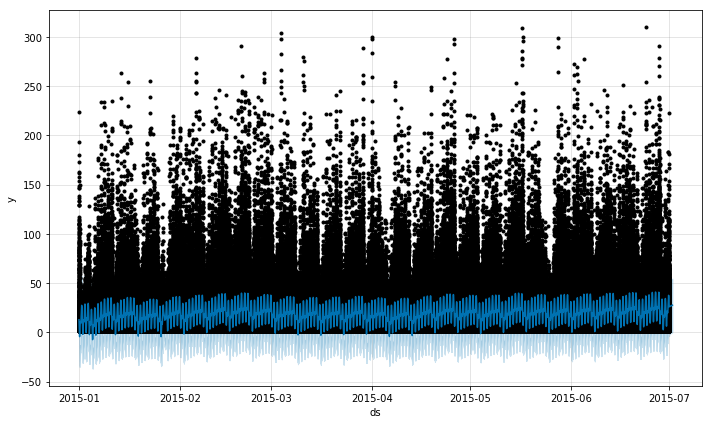

In [71]:
m.plot(forecast)

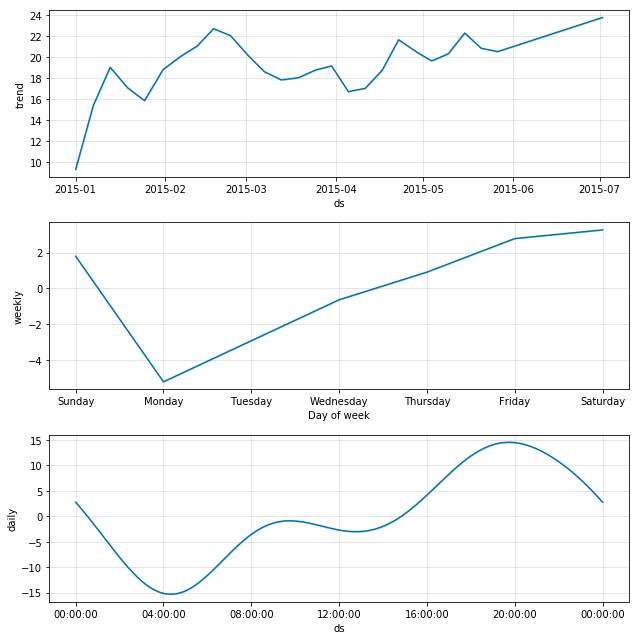

In [72]:
m.plot_components(forecast)

In [105]:
help(Prophet.add_regressor)

Help on function add_regressor in module fbprophet.forecaster:

add_regressor(self, name, prior_scale=None, standardize='auto')
    Add an additional regressor to be used for fitting and predicting.
    
    The dataframe passed to `fit` and `predict` will have a column with the
    specified name to be used as a regressor. When standardize='auto', the
    regressor will be standardized unless it is binary. The regression
    coefficient is given a prior with the specified scale parameter.
    Decreasing the prior scale will add additional regularization. If no
    prior scale is provided, self.holidays_prior_scale will be used.
    
    Parameters
    ----------
    name: string name of the regressor.
    prior_scale: optional float scale for the normal prior. If not
        provided, self.holidays_prior_scale will be used.
    standardize: optional, specify whether this regressor will be
        standardized prior to fitting. Can be 'auto' (standardize if not
        binary), True, o